# Python基础

# 1. Python 常用数据结构
### 1.1 数字

In [1]:
a = 1
a

1

In [2]:
b = 0.02
b

0.02

### 1.2 字符串

In [3]:
s = 'hello world'
s

'hello world'

In [4]:
s = "hello world"
s

'hello world'

In [5]:
s = 'hello' + ' world'
s

'hello world'

字符串索引:

In [6]:
s[0]

'h'

In [7]:
s[-1]

'd'

In [8]:
s[0:5]

'hello'

### 1.3 列表 List

In [9]:
a = [1, 2.0, 'hello', 5 + 1.0]
a

[1, 2.0, 'hello', 6.0]

In [10]:
a + a

[1, 2.0, 'hello', 6.0, 1, 2.0, 'hello', 6.0]

In [11]:
a[1]

2.0

In [12]:
len(a)

4

In [13]:
a.append('world')
a

[1, 2.0, 'hello', 6.0, 'world']

### 1.4 集合 Set

In [14]:
s = {2, 3, 4, 2}
s

{2, 3, 4}

In [15]:
a = {1, 2, 3, 4}
b = {2, 3, 4, 5}
a & b

{2, 3, 4}

In [16]:
a | b

{1, 2, 3, 4, 5}

In [17]:
a - b

{1}

In [18]:
a ^ b

{1, 5}

### 1.5 字典 Dictionary 

In [19]:
d = {'dogs':5, 'cats':4}
d

{'dogs': 5, 'cats': 4}

In [20]:
d["dogs"]

5

In [21]:
d["dogs"] = 2
d

{'dogs': 2, 'cats': 4}

In [22]:
d["pigs"] = 7
d

{'dogs': 2, 'cats': 4, 'pigs': 7}

In [23]:
d.keys()

dict_keys(['dogs', 'cats', 'pigs'])

In [24]:
d.values()

dict_values([2, 4, 7])

In [25]:
d.items()

dict_items([('dogs', 2), ('cats', 4), ('pigs', 7)])

### 1.6 数组 Numpy Arrays

Numpy数组可以进行很多列表不能进行的运算

In [26]:
from numpy import array
a = array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [27]:
a + 2

array([3, 4, 5, 6])

In [28]:
a + a

array([2, 4, 6, 8])

In [29]:
a * a

array([ 1,  4,  9, 16])

In [30]:
a ** a

array([  1,   4,  27, 256], dtype=int32)

In [31]:
a[:2] + a[-2:]

array([4, 6])

In [32]:
a.shape

(4,)

In [33]:
a.shape = 2,2
a

array([[1, 2],
       [3, 4]])

In [34]:
a.ndim

2

### 1.7 Pandas一维数据结构：Series

In [35]:
import numpy as np
import pandas as pd

`Series` 是一维带标记的数组结构，可以存储任意类型的数据（整数，浮点数，字符串，`Python` 对象等等）。

作为一维结构，它的索引叫做 `index`，基本调用方法为

    s = pd.Series(data, index=index)
    
其中，`data` 可以是以下结构：

- 字典
- `ndarray`
- 标量，例如 `5`

`index` 是一维坐标轴的索引列表。

如果 `data` 是个 `ndarray`，那么 `index` 的长度必须跟 `data` 一致：

In [36]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

s

a   -0.391071
b   -0.297148
c    0.891443
d    0.131647
e   -2.088058
dtype: float64

In [37]:
pd.Series(np.random.randn(5))

0   -0.699289
1    0.129665
2    1.024578
3    0.020544
4   -0.579999
dtype: float64

#### 向量化操作

简单的向量操作与 `ndarray` 的表现一致：

In [38]:
s + s

a   -0.782142
b   -0.594295
c    1.782887
d    0.263294
e   -4.176116
dtype: float64

In [39]:
s * 2

a   -0.782142
b   -0.594295
c    1.782887
d    0.263294
e   -4.176116
dtype: float64

但 `Series` 和 `ndarray` 不同的地方在于，`Series` 的操作默认是使用 `index` 的值进行对齐的，而不是相对位置：

In [40]:
s[1:] + s[:-1]

a         NaN
b   -0.594295
c    1.782887
d    0.263294
e         NaN
dtype: float64

对于上面两个不能完全对齐的 `Series`，结果的 `index` 是两者 `index` 的并集，同时不能对齐的部分当作缺失值处理。

### 1.8 Pandas二维数据结构：DataFrame

`DataFrame` 是 `pandas` 中的二维数据结构，可以看成一个 `Excel` 中的工作表，或者一个 `SQL` 表，或者一个存储 `Series` 对象的字典。

`DataFrame(data, index, columns)` 中的 `data` 可以接受很多数据类型：

- 一个存储一维数组，字典，列表或者 `Series` 的字典
- 2-D 数组
- 结构或者记录数组
- 一个 `Series`
- 另一个 `DataFrame`

`index` 用于指定行的 `label`，`columns` 用于指定列的 `label`，如果参数不传入，那么会按照传入的内容进行设定。

#### 从 Series 字典中构造

In [41]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

如果没有传入 `columns` 的值，那么 `columns` 的值默认为字典 `key`，`index` 默认为所有 `value` 中 `index` 的并集。

In [42]:
df = pd.DataFrame(d)

df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


如果指定了 `index` 值，`index` 为指定的 `index` 值：

In [43]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


如果指定了 `columns` 值，会去字典中寻找，找不到的值为 `NaN`：

In [44]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [45]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [46]:
df.columns

Index(['one', 'two'], dtype='object')

#### 列操作

`DataFrame` 可以类似于字典一样对列进行操作：

In [47]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [48]:
df['three'] = df['one'] * df['two']

df['flag'] = df['one'] > 2

df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


#### 索引和选择

基本操作：

| Operation	| Syntax | Result |
| ---- | ----- | ---- |
| Select column	| df[col] | Series |
| Select row by label | df.loc[label] | Series |
| Select row by integer location | df.iloc[loc] | Series |
| Slice rows | df[5:10]	| DataFrame |
| Select rows by boolean vector	| df[bool_vec] | DataFrame |

# 2. Pandas 10分钟介绍

In [50]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.1 产生Pandas对象

`pandas` 中有三种基本结构：

- `Series`
    - 1D labeled homogeneously-typed array
- `DataFrame`
    - General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
- `Panel`
    - General 3D labeled, also size-mutable array

### Series

一维 `Series` 可以用一维列表初始化：

In [51]:
s = pd.Series([1,3,5,np.nan,6,8])

print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


默认情况下，`Series` 的下标都是数字（可以使用额外参数指定），类型是统一的。

### DataFrame

`DataFrame` 则是个二维结构，这里首先构造一组时间序列，作为我们第一维的下标：

In [52]:
dates = pd.date_range('20130101', periods=6)

print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


然后创建一个 `DataFrame` 结构：

In [54]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2013-01-01,0.930832,1.388172,0.526073,-0.929865
2013-01-02,-1.083502,1.236036,0.244012,1.787705
2013-01-03,-0.686629,0.279735,0.258969,-0.957478
2013-01-04,0.270126,1.097276,0.812661,1.042361
2013-01-05,-1.438070,0.199388,-0.972152,1.014465
2013-01-06,0.142988,-0.495279,1.187349,1.539723


默认情况下，如果不指定 `index` 参数和 `columns`，那么他们的值将用从 `0` 开始的数字替代。

除了向 `DataFrame` 中传入二维数组，我们也可以使用字典传入数据：

In [55]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


字典的每个 `key` 代表一列，其 `value` 可以是各种能够转化为 `Series` 的对象。

与 `Series` 要求所有的类型都一致不同，`DataFrame` 值要求每一列数据的格式相同：

In [56]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 查看数据

### 头尾数据

`head` 和 `tail` 方法可以分别查看最前面几行和最后面几行的数据（默认为 5）：

In [57]:
df.head()

,A,B,C,D
2013-01-01,0.930832,1.388172,0.526073,-0.929865
2013-01-02,-1.083502,1.236036,0.244012,1.787705
2013-01-03,-0.686629,0.279735,0.258969,-0.957478
2013-01-04,0.270126,1.097276,0.812661,1.042361
2013-01-05,-1.438070,0.199388,-0.972152,1.014465


最后 3 行：

In [58]:
df.tail(3)

,A,B,C,D
2013-01-04,0.270126,1.097276,0.812661,1.042361
2013-01-05,-1.438070,0.199388,-0.972152,1.014465
2013-01-06,0.142988,-0.495279,1.187349,1.539723


### 下标，列标，数据

下标使用 `index` 属性查看：

In [59]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

列标使用 `columns` 属性查看：

In [60]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

数据值使用 `values` 查看：

In [61]:
df.values

array([[ 0.93083159,  1.38817188,  0.52607303, -0.92986546],
       [-1.08350164,  1.23603628,  0.24401215,  1.78770527],
       [-0.68662927,  0.27973477,  0.25896899, -0.95747843],
       [ 0.27012633,  1.09727645,  0.81266068,  1.04236076],
       [-1.43806987,  0.19938819, -0.97215209,  1.01446525],
       [ 0.14298801, -0.49527868,  1.18734858,  1.5397225 ]])

### 统计数据

查看简单的统计数据：

In [62]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.310709,0.617555,0.342819,0.582818
std,0.904887,0.739444,0.736683,1.218659
min,-1.438070,-0.495279,-0.972152,-0.957478
25%,-0.984284,0.219475,0.247751,-0.443783
50%,-0.271821,0.688506,0.392521,1.028413
75%,0.238342,1.201346,0.741014,1.415382
max,0.930832,1.388172,1.187349,1.787705


### 转置

In [64]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.930832,-1.083502,-0.686629,0.270126,-1.438070,0.142988
B,1.388172,1.236036,0.279735,1.097276,0.199388,-0.495279
C,0.526073,0.244012,0.258969,0.812661,-0.972152,1.187349
D,-0.929865,1.787705,-0.957478,1.042361,1.014465,1.539723


## 排序

`sort_index(axis=0, ascending=True)` 方法按照下标大小进行排序，`axis=0` 表示按第 0 维进行排序。

In [66]:
df.sort_index(ascending=False)

,A,B,C,D
2013-01-06,0.142988,-0.495279,1.187349,1.539723
2013-01-05,-1.438070,0.199388,-0.972152,1.014465
2013-01-04,0.270126,1.097276,0.812661,1.042361
2013-01-03,-0.686629,0.279735,0.258969,-0.957478
2013-01-02,-1.083502,1.236036,0.244012,1.787705
2013-01-01,0.930832,1.388172,0.526073,-0.929865


In [68]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.929865,0.526073,1.388172,0.930832
2013-01-02,1.787705,0.244012,1.236036,-1.083502
2013-01-03,-0.957478,0.258969,0.279735,-0.686629
2013-01-04,1.042361,0.812661,1.097276,0.270126
2013-01-05,1.014465,-0.972152,0.199388,-1.438070
2013-01-06,1.539723,1.187349,-0.495279,0.142988


`sort_values(by, axis=0, ascending=True)` 方法按照 `by` 的值的大小进行排序，例如按照 `B` 列的大小：

In [70]:
df.sort_values(by="B")

,A,B,C,D
2013-01-06,0.142988,-0.495279,1.187349,1.539723
2013-01-05,-1.438070,0.199388,-0.972152,1.014465
2013-01-03,-0.686629,0.279735,0.258969,-0.957478
2013-01-04,0.270126,1.097276,0.812661,1.042361
2013-01-02,-1.083502,1.236036,0.244012,1.787705
2013-01-01,0.930832,1.388172,0.526073,-0.929865


## 索引

虽然 `DataFrame` 支持 `Python/Numpy` 的索引语法，但是推荐使用 `.at, .iat, .loc, .iloc 和 .ix` 方法进行索引。

### 读取数据

选择单列数据：

In [72]:
df["A"]

2013-01-01    0.930832
2013-01-02   -1.083502
2013-01-03   -0.686629
2013-01-04    0.270126
2013-01-05   -1.438070
2013-01-06    0.142988
Freq: D, Name: A, dtype: float64

也可以用 `df.A`：

In [73]:
df.A

2013-01-01    0.930832
2013-01-02   -1.083502
2013-01-03   -0.686629
2013-01-04    0.270126
2013-01-05   -1.438070
2013-01-06    0.142988
Freq: D, Name: A, dtype: float64

使用切片读取多行：

In [74]:
df[0:3]

,A,B,C,D
2013-01-01,0.930832,1.388172,0.526073,-0.929865
2013-01-02,-1.083502,1.236036,0.244012,1.787705
2013-01-03,-0.686629,0.279735,0.258969,-0.957478


`index` 名字也可以进行切片：

In [75]:
df["20130101":"20130103"]

,A,B,C,D
2013-01-01,0.930832,1.388172,0.526073,-0.929865
2013-01-02,-1.083502,1.236036,0.244012,1.787705
2013-01-03,-0.686629,0.279735,0.258969,-0.957478


### 使用 `label` 索引

`loc` 可以方便的使用 `label` 进行索引：

In [76]:
df.loc[dates[0]]

A    0.930832
B    1.388172
C    0.526073
D   -0.929865
Name: 2013-01-01 00:00:00, dtype: float64

多列数据：

In [77]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.930832,1.388172
2013-01-02,-1.083502,1.236036
2013-01-03,-0.686629,0.279735
2013-01-04,0.270126,1.097276
2013-01-05,-1.438070,0.199388
2013-01-06,0.142988,-0.495279


选择多行多列：

In [78]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.083502,1.236036
2013-01-03,-0.686629,0.279735
2013-01-04,0.270126,1.097276


数据降维：

In [79]:
df.loc['20130102',['A','B']]

A   -1.083502
B    1.236036
Name: 2013-01-02 00:00:00, dtype: float64

得到标量值：

In [80]:
df.loc[dates[0],'B']

1.3881718842189799

不过得到标量值可以用 `at`，速度更快：

In [81]:
%timeit -n100 df.loc[dates[0],'B']
%timeit -n100 df.at[dates[0],'B']

print(df.at[dates[0],'B'])

12.1 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.97 µs ± 464 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.3881718842189799


### 使用位置索引

`iloc` 使用位置进行索引：

In [82]:
df.iloc[3]

A    0.270126
B    1.097276
C    0.812661
D    1.042361
Name: 2013-01-04 00:00:00, dtype: float64

连续切片：

In [83]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.270126,1.097276
2013-01-05,-1.438070,0.199388


索引不连续的部分：

In [84]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.083502,0.244012
2013-01-03,-0.686629,0.258969
2013-01-05,-1.438070,-0.972152


索引整行：

In [85]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.083502,1.236036,0.244012,1.787705
2013-01-03,-0.686629,0.279735,0.258969,-0.957478


整列：

In [86]:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.388172,0.526073
2013-01-02,1.236036,0.244012
2013-01-03,0.279735,0.258969
2013-01-04,1.097276,0.812661
2013-01-05,0.199388,-0.972152
2013-01-06,-0.495279,1.187349


标量值：

In [87]:
df.iloc[1,1]

1.236036280497105

当然，使用 `iat` 索引标量值更快：

In [89]:
%timeit -n100 df.iloc[1,1]
%timeit -n100 df.iat[1,1]

df.iat[1,1]

6.68 µs ± 428 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.87 µs ± 244 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


1.236036280497105

### 布尔型索引

所有 `A` 列大于 0 的行：

In [90]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.930832,1.388172,0.526073,-0.929865
2013-01-04,0.270126,1.097276,0.812661,1.042361
2013-01-06,0.142988,-0.495279,1.187349,1.539723


只留下所有大于 0 的数值：

In [91]:
df[df > 0]

,A,B,C,D
2013-01-01,0.930832,1.388172,0.526073,NaN
2013-01-02,NaN,1.236036,0.244012,1.787705
2013-01-03,NaN,0.279735,0.258969,NaN
2013-01-04,0.270126,1.097276,0.812661,1.042361
2013-01-05,NaN,0.199388,NaN,1.014465
2013-01-06,0.142988,NaN,1.187349,1.539723


使用 `isin` 方法做 `filter` 过滤：

In [92]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2013-01-01,0.930832,1.388172,0.526073,-0.929865,one
2013-01-02,-1.083502,1.236036,0.244012,1.787705,one
2013-01-03,-0.686629,0.279735,0.258969,-0.957478,two
2013-01-04,0.270126,1.097276,0.812661,1.042361,three
2013-01-05,-1.438070,0.199388,-0.972152,1.014465,four
2013-01-06,0.142988,-0.495279,1.187349,1.539723,three


In [93]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.686629,0.279735,0.258969,-0.957478,two
2013-01-05,-1.438070,0.199388,-0.972152,1.014465,four


### 设定数据的值

In [94]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

像字典一样，直接指定 `F` 列的值为 `s1`，此时以 `df` 已有的 `index` 为标准将二者进行合并，`s1` 中没有的 `index` 项设为 `NaN`，多余的项舍去：

In [95]:
df['F'] = s1

df

,A,B,C,D,F
2013-01-01,0.930832,1.388172,0.526073,-0.929865,NaN
2013-01-02,-1.083502,1.236036,0.244012,1.787705,1.0
2013-01-03,-0.686629,0.279735,0.258969,-0.957478,2.0
2013-01-04,0.270126,1.097276,0.812661,1.042361,3.0
2013-01-05,-1.438070,0.199388,-0.972152,1.014465,4.0
2013-01-06,0.142988,-0.495279,1.187349,1.539723,5.0


或者使用 `at` 或 `iat` 修改单个值：

In [96]:
df.at[dates[0],'A'] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,1.388172,0.526073,-0.929865,NaN
2013-01-02,-1.083502,1.236036,0.244012,1.787705,1.0
2013-01-03,-0.686629,0.279735,0.258969,-0.957478,2.0
2013-01-04,0.270126,1.097276,0.812661,1.042361,3.0
2013-01-05,-1.438070,0.199388,-0.972152,1.014465,4.0
2013-01-06,0.142988,-0.495279,1.187349,1.539723,5.0


In [97]:
df.iat[0, 1] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.526073,-0.929865,NaN
2013-01-02,-1.083502,1.236036,0.244012,1.787705,1.0
2013-01-03,-0.686629,0.279735,0.258969,-0.957478,2.0
2013-01-04,0.270126,1.097276,0.812661,1.042361,3.0
2013-01-05,-1.438070,0.199388,-0.972152,1.014465,4.0
2013-01-06,0.142988,-0.495279,1.187349,1.539723,5.0


设定一整列：

In [98]:
df.loc[:,'D'] = np.array([5] * len(df))

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.526073,5,NaN
2013-01-02,-1.083502,1.236036,0.244012,5,1.0
2013-01-03,-0.686629,0.279735,0.258969,5,2.0
2013-01-04,0.270126,1.097276,0.812661,5,3.0
2013-01-05,-1.438070,0.199388,-0.972152,5,4.0
2013-01-06,0.142988,-0.495279,1.187349,5,5.0


设定满足条件的数值：

In [99]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.526073,-5,NaN
2013-01-02,-1.083502,-1.236036,-0.244012,-5,-1.0
2013-01-03,-0.686629,-0.279735,-0.258969,-5,-2.0
2013-01-04,-0.270126,-1.097276,-0.812661,-5,-3.0
2013-01-05,-1.438070,-0.199388,-0.972152,-5,-4.0
2013-01-06,-0.142988,-0.495279,-1.187349,-5,-5.0


## 缺失数据

In [100]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.526073,5,NaN,1.0
2013-01-02,-1.083502,1.236036,0.244012,5,1.0,1.0
2013-01-03,-0.686629,0.279735,0.258969,5,2.0,NaN
2013-01-04,0.270126,1.097276,0.812661,5,3.0,NaN


丢弃所有缺失数据的行得到的新数据：

In [101]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.083502,1.236036,0.244012,5,1.0,1.0


填充缺失数据：

In [102]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.526073,5,5.0,1.0
2013-01-02,-1.083502,1.236036,0.244012,5,1.0,1.0
2013-01-03,-0.686629,0.279735,0.258969,5,2.0,5.0
2013-01-04,0.270126,1.097276,0.812661,5,3.0,5.0


检查缺失数据的位置：

In [103]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 计算操作

### 统计信息

每一列的均值：

In [104]:
df.mean()

A   -0.465848
B    0.386193
C    0.342819
D    5.000000
F    3.000000
dtype: float64

每一行的均值：

In [105]:
df.mean(1)

2013-01-01    1.381518
2013-01-02    1.279309
2013-01-03    1.370415
2013-01-04    2.036013
2013-01-05    1.357833
2013-01-06    2.167012
Freq: D, dtype: float64

多个对象之间的操作，如果维度不对，`pandas` 会自动调用 `broadcasting` 机制：

In [106]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

print(s)

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64


相减 `df - s`：

In [107]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.686629,-0.720265,-0.741031,4.0,1.0
2013-01-04,-2.729874,-1.902724,-2.187339,2.0,0.0
2013-01-05,-6.438070,-4.800612,-5.972152,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### apply 操作

与 `R` 中的 `apply` 操作类似，接收一个函数，默认是对将函数作用到每一列上：

In [108]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.526073,5,NaN
2013-01-02,-1.083502,1.236036,0.770085,10,1.0
2013-01-03,-1.770131,1.515771,1.029054,15,3.0
2013-01-04,-1.500005,2.613047,1.841715,20,6.0
2013-01-05,-2.938074,2.812436,0.869563,25,10.0
2013-01-06,-2.795086,2.317157,2.056911,30,15.0


求每列最大最小值之差：

In [109]:
df.apply(lambda x: x.max() - x.min())

A    1.708196
B    1.731315
C    2.159501
D    0.000000
F    4.000000
dtype: float64

### 直方图

In [110]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)

0    4
1    6
2    2
3    2
4    4
5    3
6    0
7    0
8    3
9    1
dtype: int32


直方图信息：

In [111]:
print(s.value_counts())

4    2
3    2
2    2
0    2
6    1
1    1
dtype: int64


绘制直方图信息：

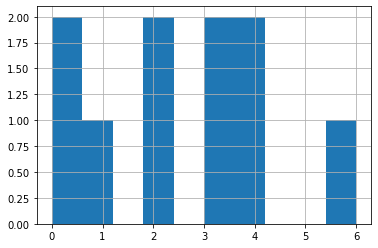

In [114]:
h = s.hist()

### 字符串方法

当 `Series` 或者 `DataFrame` 的某一列是字符串时，我们可以用 `.str` 对这个字符串数组进行字符串的基本操作： 

In [115]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

print(s.str.lower())

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


## 合并

### 连接

In [116]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,1.389512,1.654250,-1.045115,1.307092
1,-1.257233,0.119677,-1.593614,0.247077
2,-0.150465,1.760264,-0.011067,-0.838017
3,-1.360947,0.849280,-1.138585,0.348607
4,-1.281877,1.012187,-0.873744,-1.664281
5,0.355814,0.773204,-1.316621,-0.222620
6,0.009654,0.617403,0.714654,-0.816418
7,-0.000414,0.700567,-0.071003,0.118879
8,0.326674,1.045098,-1.677747,-0.948250
9,-0.133706,0.557059,0.537434,0.329009


可以使用 `pd.concat` 函数将多个 `pandas` 对象进行连接：

In [117]:
pieces = [df[:2], df[4:5], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,1.389512,1.654250,-1.045115,1.307092
1,-1.257233,0.119677,-1.593614,0.247077
4,-1.281877,1.012187,-0.873744,-1.664281
7,-0.000414,0.700567,-0.071003,0.118879
8,0.326674,1.045098,-1.677747,-0.948250
9,-0.133706,0.557059,0.537434,0.329009


### 数据库中的 Join

`merge` 可以实现数据库中的 `join` 操作：

In [122]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [123]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### append

向 `DataFrame` 中添加行：

In [124]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

df

,A,B,C,D
0,0.937837,-1.614231,0.161506,1.388221
1,0.163856,-0.666541,-0.079230,2.207244
2,0.736106,0.412114,-0.223511,0.195125
3,1.680288,0.679103,1.912433,0.057921
4,0.199616,-0.040232,-1.308178,0.359331
5,-0.998282,0.181225,0.588982,-0.558540
6,0.567463,1.147116,0.444354,1.795370
7,-0.823486,0.608082,1.386478,0.502626


将第三行的值添加到最后：

In [125]:
s = df.iloc[3]

df.append(s, ignore_index=True)

,A,B,C,D
0,0.937837,-1.614231,0.161506,1.388221
1,0.163856,-0.666541,-0.079230,2.207244
2,0.736106,0.412114,-0.223511,0.195125
3,1.680288,0.679103,1.912433,0.057921
4,0.199616,-0.040232,-1.308178,0.359331
5,-0.998282,0.181225,0.588982,-0.558540
6,0.567463,1.147116,0.444354,1.795370
7,-0.823486,0.608082,1.386478,0.502626
8,1.680288,0.679103,1.912433,0.057921


### Grouping

In [128]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-0.958940,-0.005494
1,bar,one,-0.608926,-0.021452
2,foo,two,1.679024,-0.482465
3,bar,three,-0.056294,-0.362286
4,foo,two,1.555639,0.380361
5,bar,two,1.879979,-0.227308
6,foo,one,-1.761195,-0.531552
7,foo,three,2.249583,2.560065


按照 `A` 的值进行分类：

In [129]:
df.groupby('A').sum()

,C,D
A,,
bar,1.214759,-0.611045
foo,2.764111,1.920916


按照 `A, B` 的值进行分类：

In [130]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.608926 -0.021452
    three -0.056294 -0.362286
    two    1.879979 -0.227308
foo one   -2.720135 -0.537045
    three  2.249583  2.560065
    two    3.234663 -0.102103

## 改变形状

### Stack

产生一个多 `index` 的 `DataFrame`：

In [131]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

A         B
first second                    
bar   one     0.774864  0.463285
      two    -0.867995  1.321638
baz   one    -0.148791 -1.053125
      two    -0.243865  1.984993
foo   one     0.531393 -0.420909
      two    -0.087908 -0.144013
qux   one     1.516681  0.557655
      two    -0.544756  0.228163

`stack` 方法将 `columns` 变成一个新的 `index` 部分：

In [132]:
df2 = df[:4]

stacked = df2.stack()

stacked

first  second   
bar    one     A    0.774864
               B    0.463285
       two     A   -0.867995
               B    1.321638
baz    one     A   -0.148791
               B   -1.053125
       two     A   -0.243865
               B    1.984993
dtype: float64

可以使用 `unstack()` 将最后一级 `index` 放回 `column`：

In [133]:
stacked.unstack()

A         B
first second                    
bar   one     0.774864  0.463285
      two    -0.867995  1.321638
baz   one    -0.148791 -1.053125
      two    -0.243865  1.984993

也可以指定其他的级别：

In [134]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.774864 -0.867995
      B  0.463285  1.321638
baz   A -0.148791 -0.243865
      B -1.053125  1.984993

## 时间序列

金融分析中常用到时间序列数据：

In [135]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    1.185944
2012-03-07    0.185575
2012-03-08   -0.872285
2012-03-09   -0.397521
2012-03-10    0.076057
Freq: D, dtype: float64

标准时间表示：

In [136]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00    1.185944
2012-03-07 00:00:00+00:00    0.185575
2012-03-08 00:00:00+00:00   -0.872285
2012-03-09 00:00:00+00:00   -0.397521
2012-03-10 00:00:00+00:00    0.076057
Freq: D, dtype: float64

改变时区表示：

In [137]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.185944
2012-03-06 19:00:00-05:00    0.185575
2012-03-07 19:00:00-05:00   -0.872285
2012-03-08 19:00:00-05:00   -0.397521
2012-03-09 19:00:00-05:00    0.076057
Freq: D, dtype: float64

## Categoricals

In [138]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


可以将 `grade` 变成类别：

In [139]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将类别的表示转化为有意义的字符：

In [140]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

添加缺失的类别：

In [141]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

使用 `grade` 分组：

In [142]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图

使用 `ggplot` 风格：

In [143]:
plt.style.use('ggplot')

`Series` 绘图：

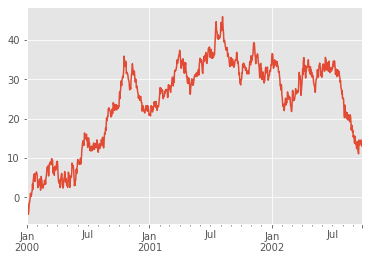

In [144]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

p = ts.cumsum().plot()

`DataFrame` 按照 `columns` 绘图：

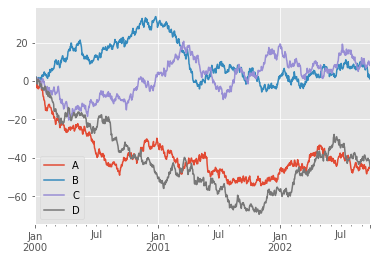

In [145]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df.cumsum().plot()
p = plt.legend(loc="best")

## 文件读写

### csv

写入文件：

In [146]:
df.to_csv('foo.csv')

从文件中读取：

In [147]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.357664,-1.510800,-0.081209,0.985303
1,2000-01-02,1.186070,0.713685,0.658628,1.357909
2,2000-01-03,-1.850055,1.149238,-0.875208,-0.920585
3,2000-01-04,-2.002074,1.758719,-0.836658,0.112474
4,2000-01-05,-1.127084,-2.111435,1.211663,-1.959795


清理生成的临时文件：

In [148]:
import glob
import os

for f in glob.glob("foo*"):
    os.remove(f)



# 3. TA-Lib

In [149]:
import talib as ta
import pandas as pd
from jqdatasdk import *

In [151]:
# ID是申请时所填写的手机号；Password为聚宽官网登录密码
auth('ID','Password') 

auth success 


In [152]:
# 获取HS300周K收盘价
df = get_price('000300.XSHG', start_date='2019-07-01', end_date='2019-09-30', frequency='1d', fields=['close','open','high','low'], skip_paused=False, fq='pre')
df

,close,open,high,low
2019-07-01,3935.8100,3899.3300,3936.6700,3886.9100
2019-07-02,3937.1700,3931.0500,3942.4300,3918.9400
2019-07-03,3893.5300,3927.4400,3927.4400,3878.8400
2019-07-04,3873.1000,3895.2000,3906.8900,3854.6900
2019-07-05,3893.2000,3875.3700,3900.3100,3857.9300
2019-07-08,3802.7900,3875.7500,3875.7500,3775.0300
2019-07-09,3793.1300,3798.1000,3811.1000,3774.7600
2019-07-10,3786.7400,3807.9500,3810.4000,3774.2300
2019-07-11,3785.2200,3806.1900,3830.7400,3774.4100
2019-07-12,3808.7300,3783.0700,3820.2400,3774.5200


In [153]:
print(df["close"].rolling(window=10).mean().head(20))

2019-07-01         NaN
2019-07-02         NaN
2019-07-03         NaN
2019-07-04         NaN
2019-07-05         NaN
2019-07-08         NaN
2019-07-09         NaN
2019-07-10         NaN
2019-07-11         NaN
2019-07-12    3850.942
2019-07-15    3839.780
2019-07-16    3826.747
2019-07-17    3817.858
2019-07-18    3807.388
2019-07-19    3798.864
2019-07-22    3796.753
2019-07-23    3796.431
2019-07-24    3799.740
2019-07-25    3806.325
2019-07-26    3811.309
Name: close, dtype: float64


In [154]:
df['SMA'] = ta.MA(df['close'], 20)
df['EMA']  = ta.EMA(df['close'], 20)
df

,close,open,high,low,SMA,EMA
2019-07-01,3935.8100,3899.3300,3936.6700,3886.9100,NaN,NaN
2019-07-02,3937.1700,3931.0500,3942.4300,3918.9400,NaN,NaN
2019-07-03,3893.5300,3927.4400,3927.4400,3878.8400,NaN,NaN
2019-07-04,3873.1000,3895.2000,3906.8900,3854.6900,NaN,NaN
2019-07-05,3893.2000,3875.3700,3900.3100,3857.9300,NaN,NaN
2019-07-08,3802.7900,3875.7500,3875.7500,3775.0300,NaN,NaN
2019-07-09,3793.1300,3798.1000,3811.1000,3774.7600,NaN,NaN
2019-07-10,3786.7400,3807.9500,3810.4000,3774.2300,NaN,NaN
2019-07-11,3785.2200,3806.1900,3830.7400,3774.4100,NaN,NaN
2019-07-12,3808.7300,3783.0700,3820.2400,3774.5200,NaN,NaN


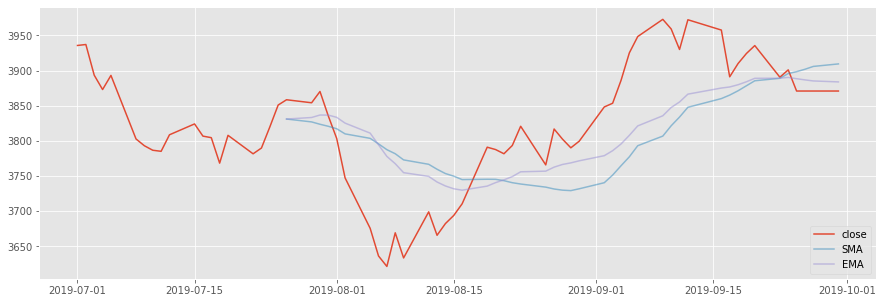

In [155]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
plt.plot(df['close'], label='close')
plt.plot(df['SMA'], alpha=0.5, label='SMA')
plt.plot(df['EMA'], alpha=0.5, label='EMA')
plt.legend(loc='lower right')
plt.show()

In [156]:
df['diff'], df['dea'], df['macd'] = ta.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
df

,close,open,high,low,SMA,EMA,diff,dea,macd
2019-07-01,3935.8100,3899.3300,3936.6700,3886.9100,NaN,NaN,NaN,NaN,NaN
2019-07-02,3937.1700,3931.0500,3942.4300,3918.9400,NaN,NaN,NaN,NaN,NaN
2019-07-03,3893.5300,3927.4400,3927.4400,3878.8400,NaN,NaN,NaN,NaN,NaN
2019-07-04,3873.1000,3895.2000,3906.8900,3854.6900,NaN,NaN,NaN,NaN,NaN
2019-07-05,3893.2000,3875.3700,3900.3100,3857.9300,NaN,NaN,NaN,NaN,NaN
2019-07-08,3802.7900,3875.7500,3875.7500,3775.0300,NaN,NaN,NaN,NaN,NaN
2019-07-09,3793.1300,3798.1000,3811.1000,3774.7600,NaN,NaN,NaN,NaN,NaN
2019-07-10,3786.7400,3807.9500,3810.4000,3774.2300,NaN,NaN,NaN,NaN,NaN
2019-07-11,3785.2200,3806.1900,3830.7400,3774.4100,NaN,NaN,NaN,NaN,NaN
2019-07-12,3808.7300,3783.0700,3820.2400,3774.5200,NaN,NaN,NaN,NaN,NaN


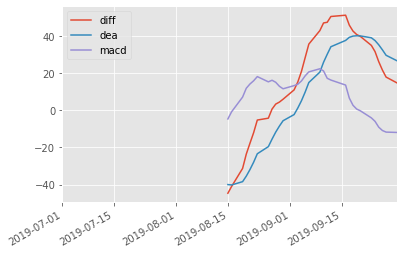

In [157]:
df[['diff','dea','macd']].plot()